In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`

Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create a session
Session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
Session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

Text(0, 0.5, 'Inches')

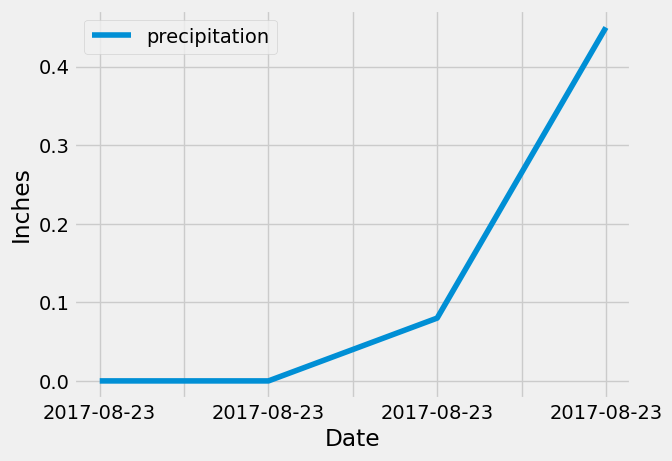

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
Last_date= Session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

# Perform a query to retrieve the data and precipitation scores
Precipitation = Session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= Last_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
Precipitation_df = pd.DataFrame(Precipitation ,columns = ['Date','precipitation'])

# Sort the dataframe by date
Precipitation_df.sort_values('Date',inplace = True)

# Use Pandas Plotting with Matplotlib to plot the data
Precipitation_df.plot('Date','precipitation')
plt.ylabel('Inches')

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
Precipitation_df.describe()

,precipitation
count,4.0000
mean,0.1325
std,0.2150
min,0.0000
25%,0.0000
50%,0.0400
75%,0.1725
max,0.4500


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number of stations in the dataset
Session.query(func.count(Station.id)).all()

[(9,)]

In [25]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
Stations=Session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

Stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Session.query(func.min(Measurement.Tobs))

AttributeError: type object 'measurement' has no attribute 'Tobs'

Text(0.5, 4.183333333333314, 'Temperature')

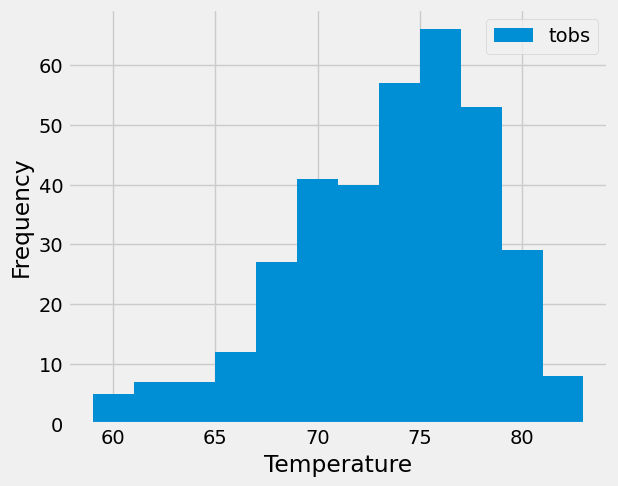

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [ ]:
# Close Session
Session.close()
